In [162]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
#import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
from IPython.display import Image 
from sklearn import model_selection
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from IPython.core.pylabtools import figsize
from scipy.stats import spearmanr, kendalltau
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')


In [10]:
#Now set up everything so that the figures show up in the notebook:
init_notebook_mode(connected=True)

In [12]:
df = pd.read_excel('Book2.xlsx')

In [13]:
df.head()

,Row Labels,Average of ViolentCrimesPerPop
0,AK,0.240000
1,AL,0.393721
2,AR,0.282000
3,AZ,0.227000
4,CA,0.330468


In [157]:
data = dict(type = 'choropleth',
            locations = df['Row Labels'],
            locationmode = 'USA-states',
            colorscale = 'magma',
            z=df['Average of ViolentCrimesPerPop'],
            text = df['Row Labels'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':'Violent Crime Per 100 Pop'}
           )

In [158]:
layout = dict(title = 'Crime USA',
              geo = dict(scope='usa',
                         showlakes=True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [159]:
choromap2 = go.Figure(data=[data],layout=layout)
iplot(choromap2)

In [50]:
df1 = pd.read_excel('Book5.xlsx')

In [51]:
df1.head()

,state,Average of population,Average of racepctblack,Average of racePctWhite
0,AK,0.136667,0.133333,0.666667
1,AL,0.046977,0.470233,0.591628
2,AR,0.036400,0.372400,0.680800
3,AZ,0.158000,0.050500,0.768000
4,CA,0.089928,0.103022,0.578993


In [52]:
data = dict(type = 'choropleth',
            locations = df1['state'],
            locationmode = 'USA-states',
            colorscale = 'Viridis',
            z=df1['Average of racepctblack'],
            text = df1['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':'Ave Black pop %'}
           )

In [53]:
layout = dict(title = 'Ave Black pop % USA',
              geo = dict(scope='usa',
                         showlakes=True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [154]:
choromap2 = go.Figure(data=[data],layout=layout)
iplot(choromap2)

In [56]:
accuracylist=[]
precisionlist=[]
recalllist=[]

In [160]:
#Read communities-crime-clean.csv
crime_df = pd.read_csv('communities-crime-clean.csv')
#data frame for decision Tree
crime_df_DT = crime_df.copy()
crime_df_DT['highCrime'] = np.where(crime_df_DT['ViolentCrimesPerPop'] > 0.1, True , False)

#find number of positive and negative instances in data and get number of true and false values in highcrime
truecount, falsecount = crime_df_DT['highCrime'].value_counts()
totalrows = crime_df_DT.shape[0]

#Percentage of positive instances
percpositive = (truecount/totalrows)*100
percnegative = (falsecount/totalrows)*100
print("Percentage of positive Instances = "+str(percpositive))
print("Percentage of negative Instances = "+str(percnegative))

Percentage of positive Instances = 62.719518314099346
Percentage of negative Instances = 37.280481685900654


In [58]:
#To decide whether to keep state and communityname
X = crime_df['state']
y = crime_df['ViolentCrimesPerPop']
print("Correlation between state and ViolentCrimePerPop")
print(spearmanr(y,X))
print(kendalltau(y, X))
X = crime_df['communityname']
y = crime_df['ViolentCrimesPerPop']
print("\nCorrelation between communityname and ViolentCrimePerPop")
print(spearmanr(y,X))
print(kendalltau(y, X))

Correlation between state and ViolentCrimePerPop
SpearmanrResult(correlation=-0.2104824314266536, pvalue=2.1547747168909474e-21)
KendalltauResult(correlation=-0.14486460882710175, pvalue=9.878525577399792e-21)

Correlation between communityname and ViolentCrimePerPop
SpearmanrResult(correlation=-0.05937492962286551, pvalue=0.00801700096139221)
KendalltauResult(correlation=-0.04007117329982029, pvalue=0.008021535263244861)


/Users/girish/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



No handles with labels found to put in legend.


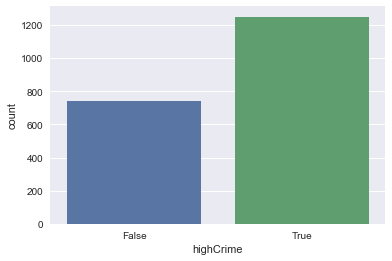

In [169]:
sns.countplot(x='highCrime',data=crime_df_DT)
plt.legend()

In [ ]:
df_new.iplot(kind='bar',x='Category',y='Values')

<b>Spearman's rho gives monotonic relationship between two variables. It will give high correlation when the variables have high rank between them.<br>
As we can see for both spearman rho and kendalltau correlation are giving low correlation values for state  and communityname with respect to ViolentCrimePerPop. Hence I dropped the two categorical column.

In [59]:
#Removing features
crime_df_DT = crime_df_DT.drop(['state','communityname','fold','ViolentCrimesPerPop'],axis=1)

Here we calculate number of True and False values for High Crime. Since we consider 0.1 as threshold. All the <b>ViolentCrimesPerPop > 0.1 are True else False </b><br>
Hence 62.72% are Positive Instances and 37.28% are negative instances

<b>---------------------------------------------------------------------------------------------------------------</b><br>
1. b. <b>Decistion Tree Classifier<br>
      On Entire Dataset</b>
      <br>
<b>---------------------------------------------------------------------------------------------------------------</b><br>i. <br>
      True Positives (TP): number of positive examples, labeled as such.
  <br>False Positives (FP): number of negative examples, labeled as positive.
<br>True Negatives (TN): number of negative examples, labeled as such.
<br>False Negatives (FN): number of positive examples, labeled as negative.
<br>Accuracy is the measure of how correctly a model predicts the classes. It is given by the formula
<br>Accuracy = (TP+TN)/(TP+TN+FP+FN)
<br>Precision (P)=  TP/(TP+FP)
<br>Recall     (R)=  TP/(TP+FN)
<br>F1 Score = (2 . P . R)/(P+R)

In [61]:
#Get List of Features

features = list(crime_df_DT.columns[:-1])
#Target
target = crime_df_DT.columns[-1]

#print(target)
X_train = crime_df_DT[features]
y_train = crime_df_DT[target]
#Decision Tree Classifier
dt_estimator = DecisionTreeClassifier()
dt_estimator.fit(X_train,y_train)
#Predict
Y_pred = dt_estimator.predict(X_train)

print("Classification Report")
print(metrics.classification_report(y_train, Y_pred))
print("Accuracy \t=",metrics.accuracy_score(y_train,Y_pred))
print("Precision \t=",metrics.precision_score(y_train,Y_pred))
print("Recall \t \t=",metrics.recall_score(y_train,Y_pred))
print("F1-Score \t=",metrics.f1_score(y_train,Y_pred))

Classification Report
             precision    recall  f1-score   support

      False       1.00      1.00      1.00       743
       True       1.00      1.00      1.00      1250

avg / total       1.00      1.00      1.00      1993

Accuracy 	= 1.0
Precision 	= 1.0
Recall 	 	= 1.0
F1-Score 	= 1.0


<b>Analysis:</b> We can see here that the Accuracy value is 1 i.e 100%. The model is overfitting as we are training the model on same dataset as well as testing it on the same dataset.
<br>The overfitted tree is as follows

Main Features
['PctKids2Par', 'racePctWhite', 'racePctHisp', 'PctLess9thGrade', 'PctEmplManu', 'blackPerCap', 'PctSpeakEnglOnly', 'HousVacant', 'PctEmploy', 'PctImmigRec10']


<Figure size 1008x504 with 0 Axes>

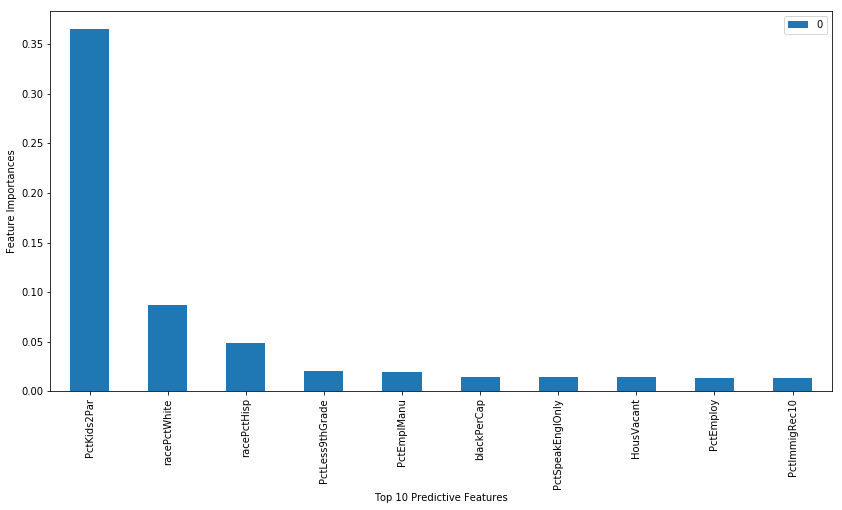

In [64]:
features_imp = dt_estimator.feature_importances_
topfeatures = 10
topindex = features_imp.argsort()[-topfeatures:][::-1]
features_list=[]
featurenames=[]
for index in topindex:
    features_list.append(features_imp[index])
    featurenames.append(features[index])

print("Main Features")    
print(featurenames)
figsize(14, 7)
plt.figure()
df_list = pd.DataFrame(features_list,featurenames)
df_list.plot.bar()
plt.xlabel('Top '+str(topfeatures)+' Predictive Features')
plt.ylabel('Feature Importances')
plt.show()

In [65]:
features_list

[0.3656740867663562,
 0.08646057909879695,
 0.0481399226351094,
 0.020783365984614183,
 0.019561291107320133,
 0.014796358836318461,
 0.014276883747369854,
 0.013881246223100822,
 0.01336397072659348,
 0.01298704501695907]

In [66]:
featurenames

['PctKids2Par',
 'racePctWhite',
 'racePctHisp',
 'PctLess9thGrade',
 'PctEmplManu',
 'blackPerCap',
 'PctSpeakEnglOnly',
 'HousVacant',
 'PctEmploy',
 'PctImmigRec10']

In [71]:
df_new = pd.read_excel('Book6.xlsx')

In [72]:
df_new.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,HightCrime,HighCrime
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,Fasle,0
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,True,1
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,True,1
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,True,1
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,True,1


In [96]:
crime_df_DT.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,highCrime
0,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,...,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,False
1,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,...,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,True
2,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,...,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,True
3,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,...,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,True
4,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,...,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,True


## Community Geography
There is a clear negative correlation between the white population and black population.
Legal segregation in the US may have ended more than 50 years ago. But in many parts of the country, Americans of different races aren't neighbours - they don't go to the same schools, they don't shop at the same stores, and they don't always have access to the same services.

Most of the communities dont prefer to stay with memebers of other community, however this trend is reverse if you consider Hispanic and Asian community.

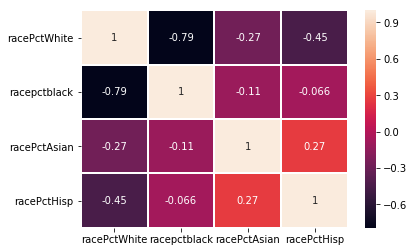

In [136]:
sns.heatmap(crime_df_DT[['racePctWhite','racepctblack','racePctAsian','racePctHisp']].corr(),annot=True,linewidths=1)

## Academic Communitywise and its effect on Crime
### Population with age 25-more
There are more number of people from black and hispanic cimmunity where the population with age 25 or more having less than 9th Grade of education come from.

When you consider HighSchool education, this trend increases in the black community , and decreases in the Hispanic communitity.

When bachelor and higher degree are considered we find the black and hispanic community lagging behind the white and asian counterparts.

These statistics further reflect how this affects the employemment stats. With black and hispanic community having high correlation with employemnt.

There is one insight as the unemploywment rate for people with less than 9 th grade education is less than that of those with HighSchool degree.

Unemployed population followed by lower than HighSchool and then less than 9th grade education are more prone to crime.


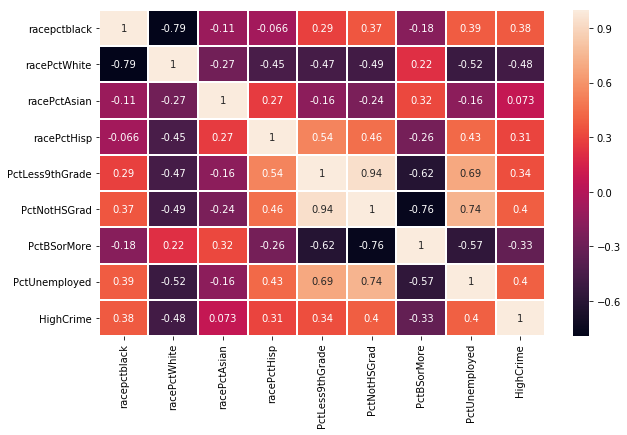

In [149]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new[['racepctblack','racePctWhite','racePctAsian','racePctHisp','PctLess9thGrade',
                         'PctNotHSGrad','PctBSorMore','PctUnemployed','HighCrime']].corr(),
            annot=True,linewidth=1)

## Income 
The median income is black community is the lowest while the Asian community is the highest earner.

Black community is also one which relies heavily on Social security income.

Population dependent on Social Security income has indicated moderate inclination towards crime.


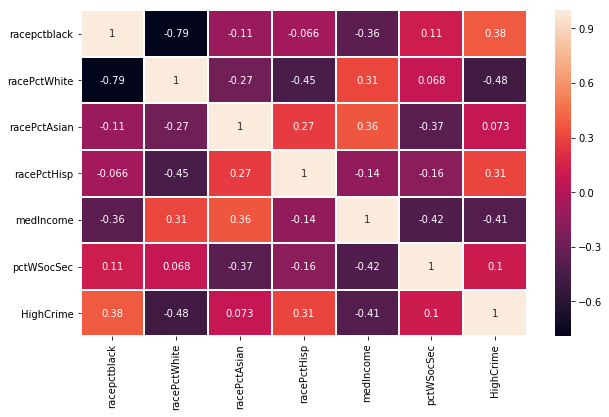

In [148]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new[['racepctblack','racePctWhite','racePctAsian','racePctHisp'
                         ,'medIncome','pctWSocSec','HighCrime']].corr(),annot=True,linewidth=1)

## Family Dynamics - Kids
The is high crime with kids having no parents or parents who are not married is quite high.

Families which are headed by two members i.e father and mother show very low inclincation towards crime.

Young kids with single working mom showed more tendency towards crime than that of single working mom with kids elder than 18 year old.

Hispanic and balck usually dont have families which are headed by two members.

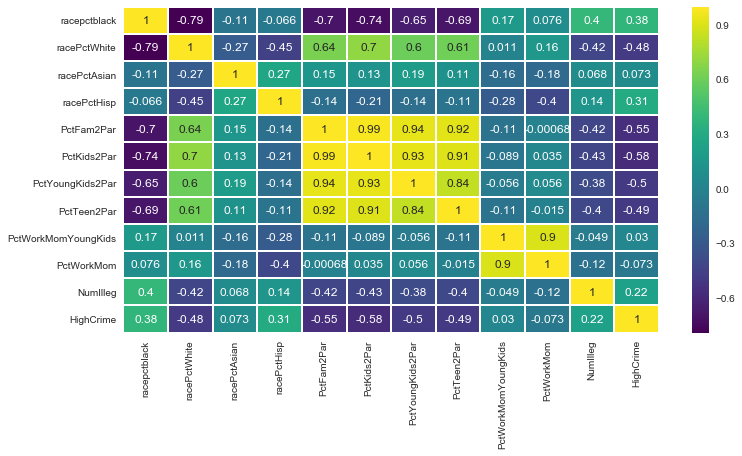

In [170]:
plt.figure(figsize=(12,6))
sns.heatmap(df_new[['racepctblack','racePctWhite','racePctAsian','racePctHisp','PctFam2Par','PctKids2Par','PctYoungKids2Par',
                    'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','HighCrime']].corr(),
            annot=True,cmap='viridis',linewidth=1)

## Family Dynamics- Divorces

Divorced people showed more tendency to commit crime.
Divorce rate are very high in the black community while moderatly high in the Hispanic community. This kinda solidies our analysis that black and hispanic familes are not lead by two members.

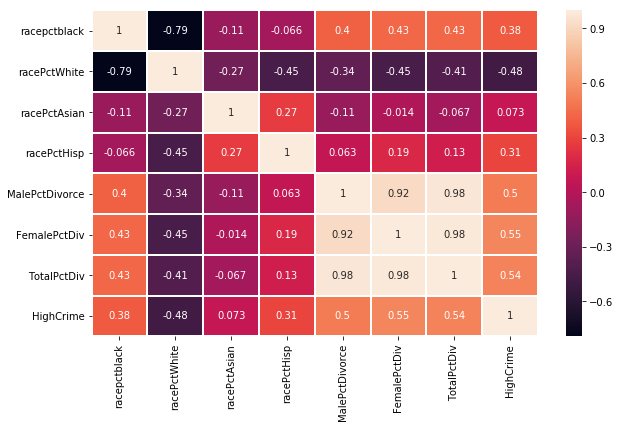

In [152]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new[['racepctblack','racePctWhite','racePctAsian','racePctHisp',
                    'MalePctDivorce','FemalePctDiv','TotalPctDiv','HighCrime']].corr(),annot=True,linewidth=1)

After all the above Exploratory Data analysis we can see that community, family dynamics, education, income play important role determining crime rate.

Keeping the trend Black community is more inclined to commit crime followed by Hispanic then Asian then white.

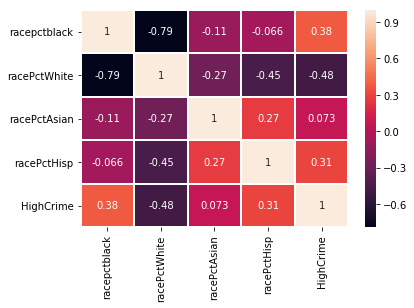

In [153]:
sns.heatmap(df_new[['racepctblack','racePctWhite','racePctAsian','racePctHisp','HighCrime']].corr(),annot=True
           ,linewidth=1)

In [129]:
a = df_new[['PctKids2Par','racePctWhite','racePctHisp','PctLess9thGrade','PctEmplManu','blackPerCap',
            'PctSpeakEnglOnly','HousVacant','PctEmploy','PctImmigRec10','HighCrime']]
a.head()

,PctKids2Par,racePctWhite,racePctHisp,PctLess9thGrade,PctEmplManu,blackPerCap,PctSpeakEnglOnly,HousVacant,PctEmploy,PctImmigRec10,HighCrime
0,0.79,0.83,0.01,0.27,0.27,0.27,0.97,0.01,0.69,0.43,0
1,0.43,0.57,0.00,0.57,1.00,0.15,0.98,0.02,0.43,0.54,1
2,0.24,0.30,0.01,0.48,0.44,0.15,0.95,0.07,0.22,0.40,1
3,0.62,0.71,0.01,0.51,0.64,0.18,0.96,0.03,0.43,0.65,1
4,0.53,0.70,0.02,0.18,0.19,0.16,0.90,0.06,0.23,0.80,1


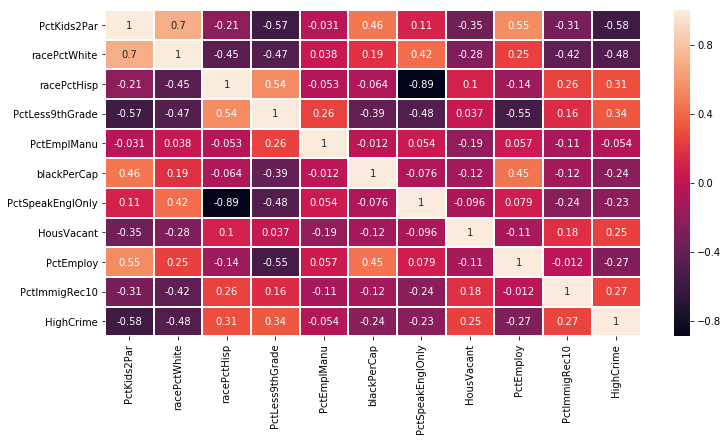

In [134]:
plt.figure(figsize=(12,6))
sns.heatmap(a.corr(),linewidths=1,annot=True)

# Missing Data

In [175]:
missing = pd.read_csv('Book1.csv')
missing.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,AL,Cullmancity,1,0.01,0.30,0.00,0.99,0.02,0.01,0.38,...,0.04,0.07,0.01,?,?,?,?,0.00,?,0.16
1,AL,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.09,0.09,0.01,?,?,?,?,0.00,?,0.15
2,AL,Fairfieldcity,1,0.00,0.45,1.00,0.00,0.01,0.00,0.43,...,0.01,0.30,0.15,?,?,?,?,0.00,?,0.80
3,AL,Huntsvillecity,1,0.24,0.37,0.48,0.58,0.13,0.02,0.44,...,0.48,0.08,0.00,0.25,0.04,0.94,0.5,0.51,0.12,0.55
4,AL,Sheffieldcity,2,0.00,0.31,0.46,0.63,0.01,0.00,0.37,...,0.02,0.13,0.01,?,?,?,?,0.00,?,0.10


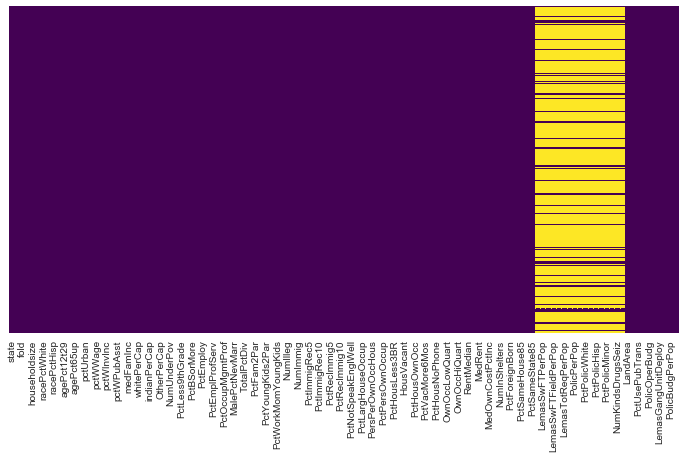

In [177]:
plt.figure(figsize=(12,6))
sns.heatmap(missing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [178]:
crime_df_DT.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,5.496237,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,...,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099,0.237983
std,16.401661,2.872650,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,...,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.240379,0.233043
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [179]:
crime_df_DT.describe().to_csv('Summary')

In [183]:
a.describe().to_csv('Summary.csv')

In [2]:
accuracylist=[]
precisionlist=[]
recalllist=[]

<center><b>---------------------------------------------------------------------------------------------------------------</b>
<h1>1. Decision Tree </h1><br>
<b>---------------------------------------------------------------------------------------------------------------</b></center>
  1. a. Creating new field highCrime 

In [3]:
#Read communities-crime-clean.csv
crime_df = pd.read_csv('communities-crime-clean.csv')
#data frame for decision Tree
crime_df_DT = crime_df.copy()
crime_df_DT['highCrime'] = np.where(crime_df_DT['ViolentCrimesPerPop'] > 0.1, True , False)

#find number of positive and negative instances in data and get number of true and false values in highcrime
truecount, falsecount = crime_df_DT['highCrime'].value_counts()
totalrows = crime_df_DT.shape[0]

#Percentage of positive instances
percpositive = (truecount/totalrows)*100
percnegative = (falsecount/totalrows)*100
print("True Counts = "+str(truecount))
print("False Counts = "+str(falsecount))
print("Percentage of positive Instances = "+str(percpositive))
print("Percentage of negative Instances = "+str(percnegative))

True Counts = 1250
False Counts = 743
Percentage of positive Instances = 62.719518314099346
Percentage of negative Instances = 37.280481685900654


In [8]:
#To decide whether to keep state and communityname
X = crime_df['state']
y = crime_df['ViolentCrimesPerPop']
print("Correlation between state and ViolentCrimePerPop")
print(spearmanr(y,X))
print(kendalltau(y, X))
X = crime_df['communityname']
y = crime_df['ViolentCrimesPerPop']
print("\nCorrelation between communityname and ViolentCrimePerPop")
print(spearmanr(y,X))
print(kendalltau(y, X))

Correlation between state and ViolentCrimePerPop
SpearmanrResult(correlation=-0.2104824314266536, pvalue=2.1547747168909474e-21)
KendalltauResult(correlation=-0.14486460882710175, pvalue=9.878525577399792e-21)

Correlation between communityname and ViolentCrimePerPop
SpearmanrResult(correlation=-0.05937492962286551, pvalue=0.00801700096139221)
KendalltauResult(correlation=-0.04007117329982029, pvalue=0.008021535263244861)


/Users/girish/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [12]:
sns.heatmap(crime_df[['communityname','ViolentCrimesPerPop']].corr(),annot=True,linewidths=1)

<b>Spearman's rho gives monotonic relationship between two variables. It will give high correlation when the variables have high rank between them.<br>
As we can see for both spearman rho and kendalltau correlation are giving low correlation values for state  and communityname with respect to ViolentCrimePerPop. Hence we dropped the two categorical column.

In [10]:
#Removing features
crime_df_DT = crime_df_DT.drop(['state','communityname','fold','ViolentCrimesPerPop'],axis=1)

Here we calculate number of True and False values for High Crime. Since we consider 0.1 as threshold. All the <b>ViolentCrimesPerPop > 0.1 are True else False </b><br>
Hence 62.72% are Positive Instances and 37.28% are negative instances

<b>---------------------------------------------------------------------------------------------------------------</b><br>
1. b. <b>Decistion Tree Classifier<br>
      On Entire Dataset</b>
      <br>
<b>---------------------------------------------------------------------------------------------------------------</b><br>i. <br>
      True Positives (TP): number of positive examples, labeled as such.
  <br>False Positives (FP): number of negative examples, labeled as positive.
<br>True Negatives (TN): number of negative examples, labeled as such.
<br>False Negatives (FN): number of positive examples, labeled as negative.
<br>Accuracy is the measure of how correctly a model predicts the classes. It is given by the formula
<br>Accuracy = (TP+TN)/(TP+TN+FP+FN)
<br>Precision (P)=  TP/(TP+FP)
<br>Recall     (R)=  TP/(TP+FN)
<br>F1 Score = (2 . P . R)/(P+R)

In [7]:
#Get List of Features

features = list(crime_df_DT.columns[:-1])
#Target
target = crime_df_DT.columns[-1]

#print(target)
X_train = crime_df_DT[features]
y_train = crime_df_DT[target]
#Decision Tree Classifier
dt_estimator = DecisionTreeClassifier()
dt_estimator.fit(X_train,y_train)
#Predict
Y_pred = dt_estimator.predict(X_train)

print("Classification Report")
print(metrics.classification_report(y_train, Y_pred))
print("Accuracy \t=",metrics.accuracy_score(y_train,Y_pred))
print("Precision \t=",metrics.precision_score(y_train,Y_pred))
print("Recall \t \t=",metrics.recall_score(y_train,Y_pred))
print("F1-Score \t=",metrics.f1_score(y_train,Y_pred))

Classification Report
             precision    recall  f1-score   support

      False       1.00      1.00      1.00       743
       True       1.00      1.00      1.00      1250

avg / total       1.00      1.00      1.00      1993

Accuracy 	= 1.0
Precision 	= 1.0
Recall 	 	= 1.0
F1-Score 	= 1.0


<b>Analysis:</b> We can see here that the Accuracy value is 1 i.e 100%. The model is overfitting as we are training the model on same dataset as well as testing it on the same dataset.
<br>The overfitted tree is as follows

In [8]:
plt.figure(figsize=(15,10))
dot_data = tree.export_graphviz(dt_estimator, out_file=None, 
                         feature_names=features,  
                         class_names=target,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

NameError: name 'pydotplus' is not defined

<b>---------------------------------------------------------------------------------------------------------------</b><br>
1.b.ii Features used for classification<br>


Main Features
['PctKids2Par', 'racePctWhite', 'racePctHisp', 'PctEmplManu', 'PctLess9thGrade', 'PctEmploy', 'PctSameState85', 'HousVacant', 'MedRent', 'PctSpeakEnglOnly']


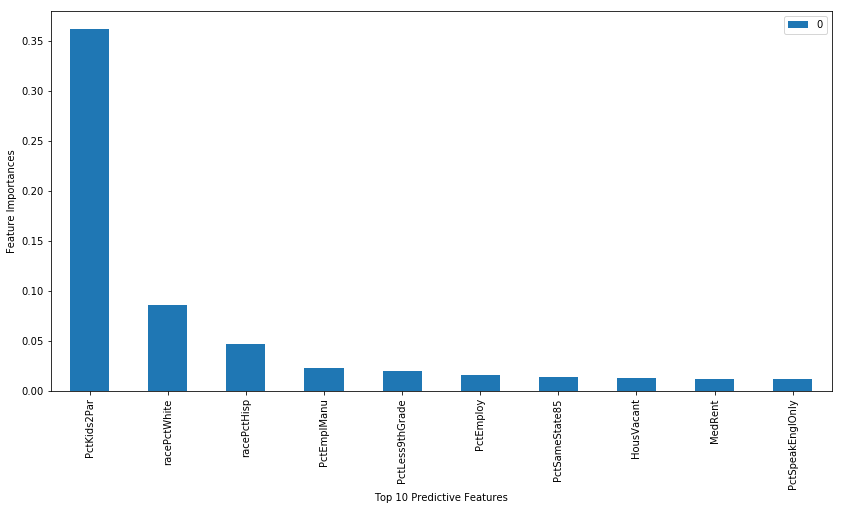

In [481]:
features_imp = dt_estimator.feature_importances_
topfeatures = 10
topindex = features_imp.argsort()[-topfeatures:][::-1]
features_list=[]
featurenames=[]
for index in topindex:
    features_list.append(features_imp[index])
    featurenames.append(features[index])

print("Main Features")    
print(featurenames)
figsize(14, 7)
plt.figure()
df_list = pd.DataFrame(features_list,featurenames)
df_list.plot.bar()
plt.xlabel('Top '+str(topfeatures)+' Predictive Features')
plt.ylabel('Feature Importances')
plt.show()

<ul><li>The feature_importances_ attribute tells the importance of the feature in building the decision tree. The higher the value, the more important the feature. It is also known as the Gini importance.
<li>Here the attribute PctKids2Par has highest feature_importances_ value. It is also the first node in the decision tree.<br>
<li>The gini impurity for the information gain is high for this attribute 'PctKids2Par', hence it is the first node on which there is a split. It means that kids with 2 parents,are less prone to committing crimes as they are taken care bu both the parents.
<li>The second important feature racePctWhite - which is percentage of caucasian population is predicted to be one of the main feature for predicting crime.
<li> Similarly other features like PctLess9thGrade - Percentage of population 25 and over with less than 9th grade are high predictive highCrime features.

<hr>
<b><u>1. c. i</u></b> Cross_val_score -> Accuracy, Precision, Recall, F1-Score

In [482]:
#CROSS VALIDATION
dt_estimator_crossval = DecisionTreeClassifier()
accuracy_score = cross_val_score(dt_estimator_crossval, X_train, y_train, cv=10,scoring = 'accuracy')
print("Accuracy =", accuracy_score)

precision_score = cross_val_score(dt_estimator_crossval,X_train,y_train,cv =10,scoring ='precision')
print("Precision =",precision_score)
recall_score=cross_val_score(dt_estimator_crossval, X_train, y_train, cv=10, scoring ='recall')
print("Recall = ",recall_score)
f1_score = cross_val_score(dt_estimator_crossval, X_train, y_train, cv=10, scoring ='f1')
print("F1 Score =",f1_score)

print("Accuracy Mean =",accuracy_score.mean())
print("Precision mean =",precision_score.mean())
print("Recall Mean",recall_score.mean())
print("F1 Score Mean =",f1_score.mean())
accuracylist.append({'Model':'DecisionTree','Accuracy':accuracy_score.mean()})
precisionlist.append({'Model':'DecisionTree','Precision':precision_score.mean()})
recalllist.append({'Model':'DecisionTree','Recall':recall_score.mean()})

Accuracy = [ 0.755       0.8         0.71        0.7638191   0.65829146  0.64321608
  0.72361809  0.71356784  0.77386935  0.71356784]
Precision = [ 0.7414966   0.84920635  0.78947368  0.78625954  0.77884615  0.77678571
  0.78512397  0.86458333  0.79411765  0.80357143]
Recall =  [ 0.864  0.864  0.776  0.856  0.64   0.688  0.808  0.656  0.864  0.736]
F1 Score = [ 0.79087452  0.83921569  0.78884462  0.82758621  0.72649573  0.70386266
  0.77862595  0.73873874  0.84328358  0.76470588]
Accuracy Mean = 0.725494974874
Precision mean = 0.796946441808
Recall Mean 0.7752
F1 Score Mean = 0.780223358422


<br><b><u>1.c.ii</u></b>
<ul><li>As we saw in the previous section, the DecisionTreeClassifier Model was overfitting, as we were training and testing on the same dataset.</li>
<li>In cross_val_score validation, the data is split into train and test dataset. We are passing cv = 10 which means 10 fold cross validation.
<li> We are using 90% of the data for training and 10% of data for testing for each of the 10 runs of the decision tree classifier.
<li> For the k fold cv, k-1 folds of data are used for training the model and the resulting model is validated using the remaining data.</li><br>

<b><u>Analysis </u></b><br>
As we can see from the mean of the accuracy score for cross_val_score and without cross validation, decision tree classifier's, <b>accuracy decreases from 100% to 72.20%. </b><br> Thus, the previous model was overfitting as we were training and testing for the same data.

<center><b>---------------------------------------------------------------------------------------------------------------</b> <h1>2.	Linear Classification</h1><br><b>---------------------------------------------------------------------------------------------------------------</b></center>

<li>2. a. GaussianNB <br>
i. 10 fold CV

In [483]:
#Gaussian NB
crime_df_NB = crime_df_DT
X_train = crime_df_NB[features]
y_train = crime_df_NB[target]
G_Naive_Bayes = GaussianNB()
print("10 fold cross validation")
acc_score_GB = cross_val_score(G_Naive_Bayes, X_train, y_train, cv=10, scoring='accuracy')
print("Accuracy = ",acc_score_GB)
prec_score_GB = cross_val_score(G_Naive_Bayes, X_train, y_train, cv=10, scoring='precision')
print("Precision = ",prec_score_GB)
recall_score_GB = cross_val_score(G_Naive_Bayes, X_train, y_train, cv=10, scoring='recall')
print("Recall = ",recall_score_GB)
f1_score_GB = cross_val_score(G_Naive_Bayes, X_train, y_train, cv=10, scoring='f1')
print("F1 Score = ",f1_score_GB)
print("Mean Scores")
print("Accuracy mean =", acc_score_GB.mean())
print("Precision mean =", prec_score_GB.mean())
print("Recall mean =", recall_score_GB.mean())
print("F1 mean =", f1_score_GB.mean())
accuracylist.append({'Model':'GaussianNB','Accuracy':acc_score_GB.mean()})
precisionlist.append({'Model':'GaussianNB','Precision':prec_score_GB.mean()})
recalllist.append({'Model':'GaussianNB','Recall':recall_score_GB.mean()})

10 fold cross validation
Accuracy =  [ 0.775       0.8         0.825       0.79899497  0.70351759  0.65326633
  0.81407035  0.73366834  0.71356784  0.79899497]
Precision =  [ 0.86363636  0.92929293  0.95        0.92079208  0.94594595  0.86842105
  0.92307692  1.          0.77868852  0.93814433]
Recall =  [ 0.76   0.736  0.76   0.744  0.56   0.528  0.768  0.576  0.76   0.728]
F1 Score =  [ 0.80851064  0.82142857  0.84444444  0.82300885  0.70351759  0.65671642
  0.83842795  0.73096447  0.76923077  0.81981982]
Mean Scores
Accuracy mean = 0.761608040201
Precision mean = 0.911799814828
Recall mean = 0.692
F1 mean = 0.781606951323


2.a. ii. 10 most predictive features

Main Features for GaussianNB


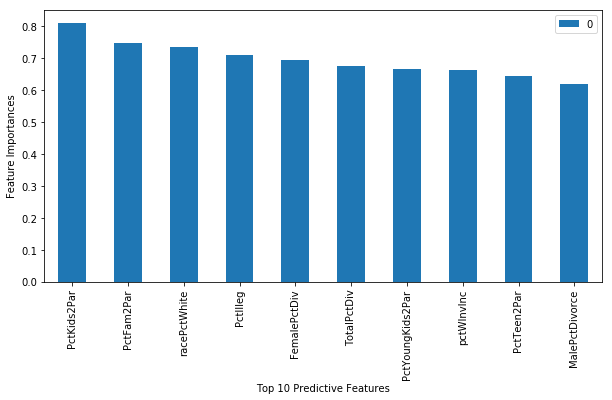

In [484]:
#getting predictive features
topfeatures = 10
#calculating Mean for all attributes wrt to True and False class
mean_all_col = crime_df_NB.groupby('highCrime').mean()
mean_T = mean_all_col.iloc[1]
mean_F = mean_all_col.iloc[0]
# Calculating Standard Deviation wrt to True and False Class
std_allcol = crime_df_NB.groupby('highCrime').apply(lambda x: x.std())
std_T=std_allcol.iloc[1]
std_F=std_allcol.iloc[0]
# Finding Normalized Absolute Difference
norm_abs_diff = (abs(mean_T-mean_F))/(std_T+std_F)

features_NB=norm_abs_diff.sort_values(ascending=False)
features_NB = features_NB.head(topfeatures)

featurelist = list(features_NB.keys())
featureval = list(features_NB.values)
# print(featurelist)
print("Main Features for GaussianNB")    
figsize(10, 5)
plt.figure()
df_list_NB = pd.DataFrame(featureval,featurelist)
df_list_NB.plot.bar()
plt.xlabel('Top '+str(topfeatures)+' Predictive Features')
plt.ylabel('Feature Importances')
plt.show()

<b><u>Analysis</u></b>
<ul><li>The top 10 predictive features is calculated by normalized absolute difference of means for the features between two classes <br>
Normalized absolute difference = |μ<sub>T</sub>-μ<sub>F</sub>|/(σ<sub>T</sub>+σ<sub>F</sub>)<br>
μ<sub>T</sub> - Mean for True values for each features<br>
μ<sub>F</sub> - Mean for False values for each features<br>
σ<sub>T</sub> - Standard Deviation for True Values for each features<br>
σ<sub>F</sub> - Standard Deviation for False Values for each feature<br>
<li>The most predictive features are: -><b>
'PctKids2Par', 'PctFam2Par', 'racePctWhite', 'PctIlleg', 'FemalePctDiv', 'TotalPctDiv', 'PctYoungKids2Par', 'pctWInvInc', 'PctTeen2Par', 'MalePctDivorce'</b>
<li>As we can see from the above bar graph, the normalized absolute difference of means is high for 'PctKids2Par' i.e Kids with 2 parents is one of the most predictive feature for highCrime attribute. This may indicates that Kids with2 parents have good life and may not be criminal prone.
<li> Other attributes like 'TotalPctDiv' - Percentage of Divorced population, MalePctDivorce - Percentage of Male Divorced Population are having more predictive to highCrime feature.
<li>Also we can check through the communities-crime.names.txt file where we can see that the absolute value of the correlation of these attribute is > 0.5

2.a.iii. Comparison with decision tree

In [485]:
#Printing mean of Cross val score  of Decision Tree and GaussianNB
df_compare = pd.DataFrame(accuracylist)
print(df_compare)
print("\n")
df_compare_p = pd.DataFrame(precisionlist)
print(df_compare_p)
print("\n")
df_compare_r = pd.DataFrame(recalllist)
print(df_compare_r)

   Accuracy         Model
0  0.725495  DecisionTree
1  0.761608    GaussianNB


          Model  Precision
0  DecisionTree   0.796946
1    GaussianNB   0.911800


          Model  Recall
0  DecisionTree  0.7752
1    GaussianNB  0.6920


<b><u>Analysis</u></b><br><ul><li>The GaussianNB performs better as compare to DecisionTree Classifier in terms of mean of Cross Validation Accuracy and Precision, but performs poorly with respect to recall.
<li> Both the models have couple of the common predictive features
<ol><li>PctKids2Par<li>racePctWhite
</ol>
<li> The other features of GaussianNB also have a high value of normalized absolute difference. Only two features were in common with top 10 features of Decision Tree Classifier


<li>2. b. LinearSVC<br>
w  =Σαiyixi            b = yk - Σαiyixi Txk    for any αk > 0


i. 10 fold cross validation

In [486]:
#Linear SVC
crime_df_LSVC = crime_df_DT
X_train_LSVC = crime_df_LSVC[features]
y_train_LSVC = crime_df_LSVC[target]
linsvc = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
linsvc.fit(X_train, y_train)

#Cross Validation
acc_linsvc = cross_val_score(linsvc, X_train_LSVC, y_train_LSVC, cv=10,scoring = 'accuracy')
prec_linsvc = cross_val_score(linsvc, X_train_LSVC, y_train_LSVC, cv=10,scoring = 'precision')
recall_linsvc = cross_val_score(linsvc, X_train_LSVC, y_train_LSVC, cv=10,scoring = 'recall')
f1_linsvc = cross_val_score(linsvc, X_train_LSVC, y_train_LSVC, cv=10,scoring = 'f1')
print("10 Fold Cross Validation Score")
print("Accuracy score = ",acc_linsvc)
print("Precision_score =",prec_linsvc)
print("Recall score =",recall_linsvc)
print("F1 Score =", f1_linsvc)
print("Accuracy mean =", acc_linsvc.mean())
print("Precision mean =", prec_linsvc.mean())
print("Recall mean =", recall_linsvc.mean())
print("F1 mean =", f1_linsvc.mean())
accuracylist.append({'Model':'Linear SVC','Accuracy':acc_linsvc.mean()})
precisionlist.append({'Model':'Linear SVC','Precision':prec_linsvc.mean()})
recalllist.append({'Model':'Linear SVC','Recall':recall_linsvc.mean()})

10 Fold Cross Validation Score
Accuracy score =  [ 0.79        0.865       0.84        0.80904523  0.69346734  0.69346734
  0.81407035  0.8241206   0.81909548  0.81407035]
Precision_score = [ 0.76774194  0.84507042  0.82517483  0.85950413  0.87209302  0.7962963
  0.84920635  0.95918367  0.80689655  0.87288136]
Recall score = [ 0.952  0.96   0.944  0.832  0.6    0.688  0.856  0.752  0.936  0.824]
F1 Score = [ 0.85        0.8988764   0.88059701  0.84552846  0.71090047  0.73819742
  0.85258964  0.84304933  0.86666667  0.84773663]
Accuracy mean = 0.796233668342
Precision mean = 0.845404856531
Recall mean = 0.8344
F1 mean = 0.83341420345


ii. 10 Most Predictive Features

Features for low and high Crime


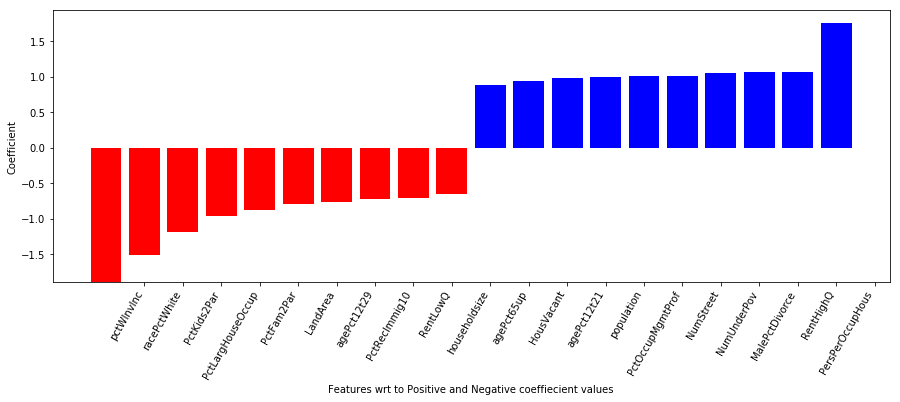

In [487]:
coef = linsvc.coef_.ravel()
# print(features)
top_features = 10

top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
feature_names = np.array(features)
# create plot
print("Features for low and high Crime")
plt.figure(figsize=(15, 5))
colors =['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(features)
plt.xticks(np.arange(1, 1+2*top_features),feature_names[top_coefficients],rotation=60,ha = 'right')
plt.xlabel('Features wrt to Positive and Negative coeffiecient values')
plt.ylabel('Coefficient')
plt.show()

<ul><li>coef_ attribute of the linearSVC classifier stores the feature weights.
<li> The positive feature weights contributes to positive classification i.e highCrime = True
<li> The negative feature weights contributes to negative classification i.e highCrime = False.
<li> The above plot shows the attributes contributing to highCrime<font color ='blue'>(in blue)</font> and low crime <font color ='red'>(in red)</font>

Features for highCrime are: 


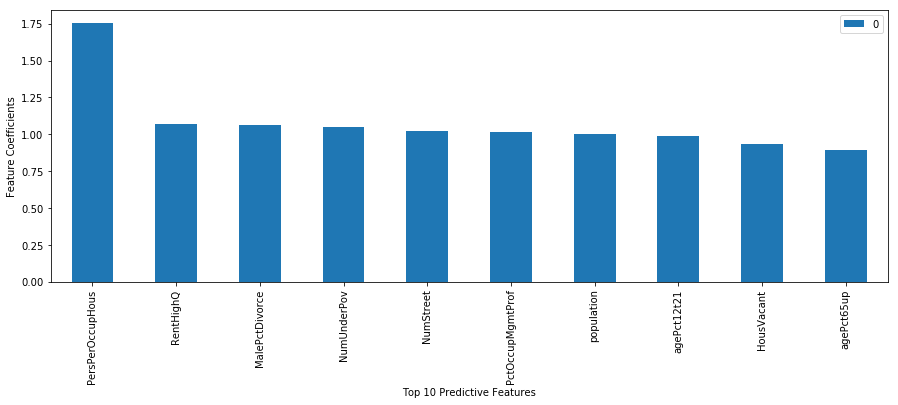

['PersPerOccupHous', 'RentHighQ', 'MalePctDivorce', 'NumUnderPov', 'NumStreet', 'PctOccupMgmtProf', 'population', 'agePct12t21', 'HousVacant', 'agePct65up']


In [488]:
#high crime rate features
feature_list = []
feature_val = []

top_features_index = np.argsort(coef)[-top_features:][::-1]
feature_names = np.array(features)
print("Features for highCrime are: ")
for ind in top_features_index:
    feature_list.append(feature_names[ind])
    feature_val.append(coef[ind])
#     feature_svc.append({'feature':feature_names[ind],'coef':coef[ind]})

figsize(15, 5)
plt.figure()
df_svc = pd.DataFrame(feature_val,feature_list)
df_svc.plot.bar()
plt.xlabel('Top '+str(topfeatures)+' Predictive Features')
plt.ylabel('Feature Coefficients')
plt.show()

print(feature_list)

<b><u>Analysis</u></b>
<ul><li>The above plot shows the top 10 predictive features.
<li> These features consist of absolute value of coeffient, and hence are the one which contributes to highcrime as well as low crime.
<li>The features are as follows:
<b>'pctWInvInc', 'PersPerOccupHous', 'racePctWhite', 'PctKids2Par', 'RentHighQ', 'MalePctDivorce', 'NumUnderPov', 'NumStreet', 'PctOccupMgmtProf', 'population'.</b><br> Few of them are explained below
<li>The weights pctWInvInc - percentage of households with investment / rent income in 1989 may indicate a lowCrime area as it might be that The household in that area are for investment and for rental purpose and good people saty in that area.<br>
<li>population - feature is more prone to highCrime as it might the case that since there are lot of people present in an area the criminal activities are easy to perform.  <br>
<li>MalePctDivorce - Divorce mail might commit more crimes like harassing there divorced wife, murder, rape. Hence the MalePctDivorce play a important predictive feature for highCrime.

iii. Comparing with decision Tree.

In [489]:
#Printing mean of Cross val score  of Decision Tree and LinearSVC
df_compare = pd.DataFrame(accuracylist)
print(df_compare)
print("\n")
df_compare_p = pd.DataFrame(precisionlist)
print(df_compare_p)
print("\n")
df_compare_r = pd.DataFrame(recalllist)
print(df_compare_r)

   Accuracy         Model
0  0.725495  DecisionTree
1  0.761608    GaussianNB
2  0.796234    Linear SVC


          Model  Precision
0  DecisionTree   0.796946
1    GaussianNB   0.911800
2    Linear SVC   0.845405


          Model  Recall
0  DecisionTree  0.7752
1    GaussianNB  0.6920
2    Linear SVC  0.8344


<b><u>Analysis</u></b>
<ul>
<li>The Linear SVC performs well as compared to Decision Tree and gaussianNB.
<li>Though the precision of Gaussian NB is very high, its performance degrades wrt to Recall. 
<li>The Linear SVC has a good balance wrt to accuracy, precision and recall.
<li>The LinearSVC gives the most predictive features for both lowCrime and highCrime

<center><b>---------------------------------------------------------------------------------------------------------------</b> <h3>3.	Regression</h3><br><b>---------------------------------------------------------------------------------------------------------------</b></center>

a. Linear Regression<br>
i. 10 fold cross validation

In [490]:
#Linear Regression
#copy original data frame
mse_list=[]
crime_df_LR  = crime_df.copy()
crime_df_LR = crime_df_LR.drop(['communityname','state','fold'], 1)
# crime_df_LR = crime_df_LR.drop('fold', 1)

features = list(crime_df_LR.columns[:-1])
target = crime_df_LR.columns[-1]
X_LR = crime_df_LR[features]
y_LR = crime_df_LR[target]

linear_regr = linear_model.LinearRegression()
score_crossval_lr = cross_val_score(linear_regr, X_LR, y_LR, cv=10,scoring = 'neg_mean_squared_error')
print("Mean Squared Error",score_crossval_lr)
print("The estimated mean square error of the model :",score_crossval_lr.mean())
mse_list.append({'regression':'Linear Regression','mse':score_crossval_lr.mean()})

Mean Squared Error [-0.02983448 -0.02048526 -0.02735939 -0.02320408 -0.01944074 -0.01262621
 -0.01844842 -0.01222962 -0.02183042 -0.01548108]
The estimated mean square error of the model : -0.0200939693044


ii. MSE on the training set

In [491]:
linear_regr.fit(X_LR,y_LR)
y_pred_LR = linear_regr.predict(X_LR)
#Mean Square Error
mse_alldata = metrics.mean_squared_error(y_LR,y_pred_LR)
print("Mean Square Error on all data =",mse_alldata)

Mean Square Error on all data = 0.0165167748803


iii. <b> Most Predictive Features for High Crime Rate

In [475]:
coef = linear_regr.coef_
print("High Crime Rate related Predictive Features")
top10index = coef.argsort()[-10:][::-1]
for index in top10index:
    print(features[index] ,"\t\t", coef[index])

High Crime Rate related Predictive Features
PersPerOccupHous 		 0.635088116499
PctHousOwnOcc 		 0.568133209887
MalePctDivorce 		 0.458517048642
PctRecImmig8 		 0.432510557653
MedRent 		 0.372727797711
medFamInc 		 0.287978874946
PctEmploy 		 0.248474316085
MalePctNevMarr 		 0.226727912842
PctPersDenseHous 		 0.214352564142
OwnOccMedVal 		 0.212875863654


iii. Most Predictive Features for low crime rate

In [492]:
print("LowCrime Rate related predictive features\n")
top10index = coef.argsort()[:10]
print("Features \t\t Coefficients")
for index in top10index:
    print(features[index] ,"\t\t", coef[index])

LowCrime Rate related predictive features

Features 		 Coefficients
pctWInvInc 		 -1.8884862795
racePctWhite 		 -1.50021840721
PctKids2Par 		 -1.19032909411
PctLargHouseOccup 		 -0.957395818428
PctFam2Par 		 -0.869809109906
LandArea 		 -0.794167634033
agePct12t29 		 -0.7596864357
PctRecImmig10 		 -0.71376869681
RentLowQ 		 -0.70370170693
householdsize 		 -0.649374033597


Plotting Graphically -> Predictive Features for low and high Crime


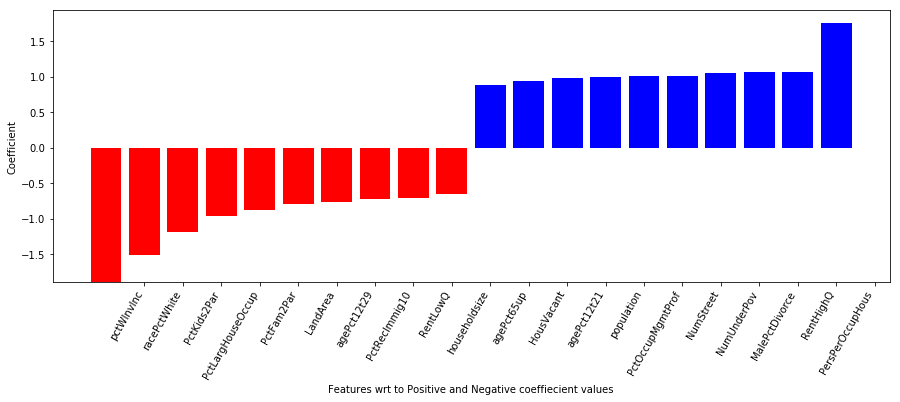

In [493]:
top_features = 10

top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]

top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
feature_names = np.array(features)
print("Plotting Graphically -> Predictive Features for low and high Crime")
plt.figure(figsize=(15, 5))
colors =['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(features)
plt.xticks(np.arange(1, 1+2*top_features),feature_names[top_coefficients],rotation=60,ha = 'right')
plt.xlabel('Features wrt to Positive and Negative coeffiecient values')
plt.ylabel('Coefficient')
plt.show()

<b><u>Analysis</u></b>
<ul>
<li>The Linear Regression model is useful for modelling relationship between a dependent variable y and one or many independent variable X.
<li>In this,  we have one dependent variable ViolentCrimesPerPop and 100 independent variable.
<li>The Mean Square Error tells us how good the model is. If the value is closer to zero then the model is better.
<li>The coefficient values is used to determined which feature is more prone to highCrime or lowCrime.
<li> Negative Coefficient value indicates predictive features for lowCrime Rate. Positive Coefficient value indicates predictive features for high Crime  rate.
<li>The first high Crime predictive  PersPerOccupHous i.e mean person per household. The number of person in an household who have occupation is less than may be the member in family is prone to make crime.
<li>The first low Crime predictive feature PctPersOwnOccup is percent of people in owner occupied household. This might mean that the people who are self occupied are less prone to committing crime.

<b>3 b. Ridge Regression </b>
<br> <li>Ridge Regression performs L2 Regularization<li>A factor of sum of square of coefficients is added to optimization factor. <li> Ridge Regression helps in minimizing the overfitting by using the regularization factor.
<li> The ridge regression optimizes the following objective function.<br>
Objective = RSS + α * (sum of square of coefficients)

In [494]:
crime_df_Ridge = crime_df_LR.copy()
features_Ridge = list(crime_df_Ridge.columns[:-1])
target_Ridge = crime_df_Ridge.columns[-1]

X_Ridge = crime_df_Ridge[features_Ridge]
# print(len(features))
y_Ridge = crime_df_Ridge[target_Ridge]

i. Estimated MSE of the model under 10 fold cv

In [495]:
ridgecv_regr_10cv = RidgeCV(alphas=(10, 1, 0.1, 0.01,0.001), 
        fit_intercept=True, normalize=False, scoring=None, 
        cv=10, gcv_mode=None, store_cv_values=False)
score_crossval_ridge = cross_val_score(ridgecv_regr_10cv, X_Ridge, y_Ridge, cv=10,scoring = 'neg_mean_squared_error')
print("MSE score for cross validation = ",score_crossval_ridge)
print("MSE score mean =",score_crossval_ridge.mean())
mse_list.append({'regression':'Ridge Regression','mse':score_crossval_ridge.mean()})

MSE score for cross validation =  [-0.0298218  -0.02024577 -0.02942133 -0.02343232 -0.01844144 -0.01194912
 -0.01780565 -0.01208248 -0.02284201 -0.01503854]
MSE score mean = -0.0201080458127


ii. MSE on the training set

In [496]:
ridgecv_regr = RidgeCV(alphas=(10, 1, 0.1, 0.01,0.001),fit_intercept=True, normalize=False, scoring=None, 
        cv=10, gcv_mode=None, store_cv_values=False)
ridge_fit = ridgecv_regr.fit(X_Ridge,y_Ridge)
ridge_predict = ridgecv_regr.predict(X_Ridge)
print("MSE on training set->",metrics.mean_squared_error(y_Ridge,ridge_predict))


MSE on training set-> 0.0167635291552


iii. Best Alpha

In [497]:
print("Best alpha for Ridge =",ridge_fit.alpha_)

Best alpha for Ridge = 1


<b><u>iv. Amount of overfitting in Linear Regression</u></b>
<ul><li>We got best alpha = 1, which indicates that there is substantial amount of overfitting that is happening
<li>The equation is given by:<img src ="http://businessforecastblog.com/wp-content/uploads/2014/05/LASSOobkf.png" >
<li>The more the alpha the stronger the regularization.


<b><u>c. Polynomial Features </u></b>
<br>i. Estimated MSE under 10 fold validation

In [498]:
crime_df_poly = crime_df_LR.copy()
features_poly = list(crime_df_poly.columns[:-1])
target_poly = crime_df_poly.columns[-1]
X_poly = crime_df_Ridge[features_poly]
y_poly = crime_df_Ridge[target_poly]


poly_reg = PolynomialFeatures(degree=2)
X_Features_Poly = poly_reg.fit_transform(X_poly)
linear_regr = linear_model.LinearRegression()

score_crossval_lr_poly = cross_val_score(linear_regr, X_Features_Poly, y_poly, cv=10,scoring = 'neg_mean_squared_error')
print("MSE Polynomial Regression",score_crossval_lr_poly)
print("Mean of MSE =",score_crossval_lr_poly.mean())
mse_list.append({'regression':'Polynomial Regession','mse':score_crossval_lr_poly.mean()})

MSE Polynomial Regression [-0.15479511 -0.14987831 -0.19852503 -0.10211292 -0.07857856 -0.14101072
 -0.09207106 -0.07377483 -0.16920729 -0.13902769]
Mean of MSE = -0.129898150931


ii. MSE on the training set

In [499]:
linear_regr.fit(X_Features_Poly,y_poly)
y_pred_poly = linear_regr.predict(X_Features_Poly)
print("Mean square error",metrics.mean_squared_error(y_poly,y_pred_poly))


Mean square error 1.69580219538e-28


<b>Mean the quadratic model is better than the linear model?

In [500]:
df_compare = pd.DataFrame(mse_list)
print(df_compare)

        mse            regression
0 -0.020094     Linear Regression
1 -0.020108      Ridge Regression
2 -0.129898  Polynomial Regession


<b><u>Analysis</u><b>
<ul>
<li>The above table displays cross validation mse score and the regression model used.
<li>It can be observed that the abs(mse) value of linear regression is the smallest and closer to zero
<li>It means that the regularization using ridge regression and polynomial features regression is not affecting the mse value
<li>Thus the linear regression model seems to be the better than ridge regression and polynomial regrsion


<b>4. Dirty Data
<ul>
<li>Imputer function is used to fill the missing values.
<li>The strategy for filling the missing values used is mean.
<li>Imputer replaces all the data having NaN values with the mean values of that column.
a.

In [552]:
crime_df_Full = pd.read_csv('communities-crime-full.csv')
crime_df_Full =  crime_df_Full.replace('?','NaN')
crime_df_Full = crime_df_Full.drop(['state','communityname','fold','county','community'], axis = 1)
crime_df_Full_imp = crime_df_Full.copy()

impute = Imputer(missing_values='NaN',strategy='mean', axis=0)
#The fit function fits the dataframe into the imputer
impute = impute.fit(crime_df_Full)
#The new values are fitted into impute and is transformed.
crime_df_Full = impute.transform(crime_df_Full_imp.values)

crime_dataframe = pd.DataFrame(crime_df_Full)
crime_dataframe.columns = crime_df_Full_imp.columns

crime_dataframe['highCrime'] = np.where(crime_dataframe['ViolentCrimesPerPop'] > 0.1, True , False)
#Removing features
crime_dataframe = crime_dataframe.drop(['ViolentCrimesPerPop'],axis=1)
truecount, falsecount = crime_dataframe['highCrime'].value_counts()
totalrows = crime_df.shape[0]

#percentage of positive instances
percpositive = (truecount/totalrows)*100
percnegative = (falsecount/totalrows)*100
print("Percentage of positive Instances = "+str(percpositive))
print("Percentage of negative Instances = "+str(percnegative))


Percentage of positive Instances = 62.7696939288
Percentage of negative Instances = 37.2804816859


There is slight change in positive instance as one more instance is added in the file

In [553]:

features = list(crime_dataframe.columns[:-1])
target = crime_dataframe.columns[-1]

X_train_unclean = crime_dataframe[features]
y_train_unclean = crime_dataframe[target]

dt_estimator = DecisionTreeClassifier()
dt_estimator.fit(X_train_unclean,y_train_unclean)
Y_pred = dt_estimator.predict(X_train_unclean)
print("Confusion matrix ")
print( metrics.confusion_matrix(y_train_unclean, Y_pred))
print("Accuracy = ", metrics.accuracy_score(y_train_unclean, Y_pred))
print("Precision = ", metrics.precision_score(y_train_unclean, Y_pred))
print("Recall = ", metrics.recall_score(y_train_unclean, Y_pred))
print("F1 = ", metrics.f1_score(y_train_unclean, Y_pred))

Confusion matrix 
[[ 743    0]
 [   0 1251]]
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 =  1.0


Cross Validation

In [554]:
#CROSS VALIDATION
dt_estimator_crossval = DecisionTreeClassifier()
accuracy_score = cross_val_score(dt_estimator_crossval, X_train_unclean, y_train_unclean, cv=10,scoring = 'accuracy')
print("Accuracy =", accuracy_score)
precision_score = cross_val_score(dt_estimator_crossval,X_train_unclean,y_train_unclean,cv =10,scoring ='precision')
print("Precision =",precision_score)
recall_score=cross_val_score(dt_estimator_crossval, X_train_unclean, y_train_unclean, cv=10, scoring ='recall')
print("Recall = ",recall_score)
f1_score = cross_val_score(dt_estimator_crossval, X_train_unclean, y_train_unclean, cv=10, scoring ='f1')
print("F1 Score =",f1_score)

print("Accuracy Mean =",accuracy_score.mean())
print("Precision mean =",precision_score.mean())
print("Recall Mean",recall_score.mean())
print("F1 Score Mean =",f1_score.mean())

Accuracy = [ 0.7960199   0.765       0.73        0.76884422  0.74371859  0.75376884
  0.81909548  0.74874372  0.73869347  0.71859296]
Precision = [ 0.83333333  0.78571429  0.78813559  0.78461538  0.78512397  0.81034483
  0.86614173  0.84684685  0.83760684  0.76190476]
Recall =  [ 0.84920635  0.8         0.808       0.824       0.76        0.792       0.84
  0.808       0.752       0.776     ]
F1 Score = [ 0.85483871  0.8         0.7654321   0.82213439  0.75518672  0.8097166
  0.86614173  0.82304527  0.75518672  0.79518072]
Accuracy Mean = 0.758247718693
Precision mean = 0.809976757005
Recall Mean 0.800920634921
F1 Score Mean = 0.804686296163


<b><u>Analysis</u></b>
<ul>
<li>The Dirty data is given to the Decision Tree classifier. The cross validation function gives a perfect score with accuracy, precision, recall, f1 score.
<li>Comparing with the initial decision tree model, we can conclude that as the dirty data DecisionTreeClassifier model overfits.
<li> Cleaning of the data is necessary, so as to create a model which will give good accuracy and performance and will also not overfit or underfit.

<h4>Extra Credits</h4>
<li> Implementing Logistic Regression and non Linear SVM

In [508]:
print("Logistic Regression Clean")
LR_CLF = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
LR_CLF_fit = LR_CLF.fit(X_train,y_train)
LR_CLF_predict = LR_CLF.predict(X_train)

crossval_LR = cross_val_score(LR_CLF, X_train, y_train, cv=10,scoring = 'accuracy')
prec_LR = cross_val_score(LR_CLF, X_train, y_train, cv=10,scoring = 'precision')
recall_LR = cross_val_score(LR_CLF, X_train, y_train, cv=10,scoring = 'recall')
print("Accuracy = ",crossval_LR)
print("Precision = ",prec_LR)
print("Recall = ",recall_LR)

accuracylist.append({'Model':'Logistic Regression Clean','Accuracy':crossval_LR.mean()})
precisionlist.append({'Model':'Logistic Regression Clean','Precision':prec_LR.mean()})
recalllist.append({'Model':'Logistic Regression Clean','Recall':recall_LR.mean()})

#High Predictive Features
coef_Logistic = LR_CLF.coef_

Logistic Regression Clean
Accuracy =  [ 0.78        0.865       0.885       0.82914573  0.70854271  0.70351759
  0.81407035  0.82914573  0.83417085  0.80904523]
Precision =  [ 0.75796178  0.83561644  0.875       0.85826772  0.87640449  0.82352941
  0.84920635  0.96907216  0.82394366  0.85365854]
Recall =  [ 0.952  0.976  0.952  0.872  0.624  0.672  0.856  0.752  0.936  0.84 ]


In [505]:
print("Logistic Regression Dirty")
LR_CLF = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
LR_CLF_fit = LR_CLF.fit(X_train_unclean,y_train_unclean)
LR_CLF_predict = LR_CLF.predict(X_train_unclean)

crossval_LR = cross_val_score(LR_CLF, X_train_unclean, y_train_unclean, cv=10,scoring = 'accuracy')
prec_LR = cross_val_score(LR_CLF, X_train_unclean, y_train_unclean, cv=10,scoring = 'precision')
recall_LR = cross_val_score(LR_CLF, X_train_unclean, y_train_unclean, cv=10,scoring = 'recall')
print("Accuracy = ",crossval_LR)
print("Precision = ",prec_LR)
print("Recall = ",recall_LR)

accuracylist.append({'Model':'Logistic Regression Uncleaned','Accuracy':crossval_LR.mean()})
precisionlist.append({'Model':'Logistic Regression Uncleaned','Precision':prec_LR.mean()})
recalllist.append({'Model':'Logistic Regression','Recall':recall_LR.mean()})

Logistic Regression Dirty
Accuracy =  [ 0.91542289  0.92        0.925       0.89949749  0.90954774  0.91457286
  0.93467337  0.91457286  0.88442211  0.87437186]
Precision =  [ 0.936       0.936       0.93650794  0.90076336  0.94214876  0.921875
  0.97457627  0.96551724  0.91803279  0.90983607]
Recall =  [ 0.92857143  0.936       0.944       0.944       0.912       0.944       0.92
  0.896       0.896       0.888     ]


<b>SGD CLASSIFIER

In [510]:
#Clean
sgd_clean = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, class_weight=None, warm_start=False, average=False)
sgd_fit = sgd_clean.fit(X_train,y_train)
sgd_predict = sgd_clean.predict(X_train)

crossval_SGD = cross_val_score(sgd_clean, X_train, y_train, cv=10,scoring = 'accuracy')
prec_SGD = cross_val_score(sgd_clean, X_train, y_train, cv=10,scoring = 'precision')
recall_SGD = cross_val_score(sgd_clean, X_train, y_train, cv=10,scoring = 'recall')
print("Accuracy = ",crossval_SGD)
print("Precision = ",prec_SGD)
print("Recall = ",recall_SGD)
accuracylist.append({'Model':'SGD Classifier Clean','Accuracy':crossval_SGD.mean()})
precisionlist.append({'Model':'SGD Classifier Clean','Precision':prec_SGD.mean()})
recalllist.append({'Model':'SGD Classifier Clean','Recall':recall_SGD.mean()})
coef_SGD = sgd_clean.coef_


Accuracy =  [ 0.795       0.685       0.905       0.84924623  0.71356784  0.63819095
  0.8040201   0.60301508  0.72864322  0.79396985]
Precision =  [ 0.77124183  0.87323944  0.87969925  0.93203883  0.71641791  0.78225806
  0.85606061  0.87903226  0.67213115  0.98795181]
Recall =  [ 0.856  0.368  0.992  0.984  0.536  0.696  0.992  0.88   0.632  0.864]


In [506]:
#SGD Dirty
sgd_unclean = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, class_weight=None, warm_start=False, average=False)
sgd_fit = sgd_unclean.fit(X_train,y_train)
sgd_predict = sgd_unclean.predict(X_train)

crossval_SGD = cross_val_score(sgd_unclean, X_train_unclean, y_train_unclean, cv=10,scoring = 'accuracy')
prec_SGD = cross_val_score(sgd_unclean, X_train_unclean, y_train_unclean, cv=10,scoring = 'precision')
recall_SGD = cross_val_score(sgd_unclean, X_train_unclean, y_train_unclean, cv=10,scoring = 'recall')
print("Accuracy = ",crossval_SGD)
print("Precision = ",prec_SGD)
print("Recall = ",recall_SGD)
accuracylist.append({'Model':'SGD Classifier unclean','Accuracy':crossval_SGD.mean()})
precisionlist.append({'Model':'SGD Classifier unclean','Precision':prec_SGD.mean()})
recalllist.append({'Model':'SGD Classifier unclean','Recall':recall_SGD.mean()})


Accuracy =  [ 0.90049751  0.865       0.845       0.82914573  0.80904523  0.78894472
  0.90452261  0.87939698  0.82914573  0.79396985]
Precision =  [ 0.77300613  0.89552239  0.99038462  0.74850299  0.82550336  0.97802198
  0.96610169  0.87681159  0.90625     0.82550336]
Recall =  [ 0.86507937  1.          1.          0.944       0.912       1.          0.912
  0.664       0.648       0.96      ]


<b>Method giving Best Results</b>

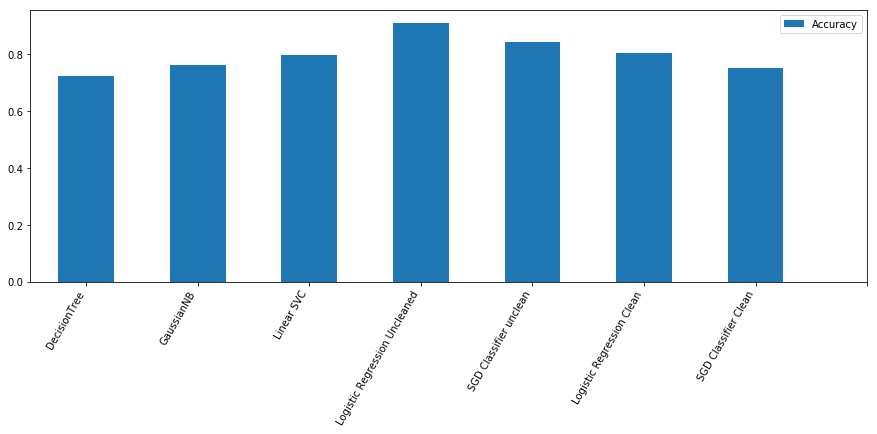

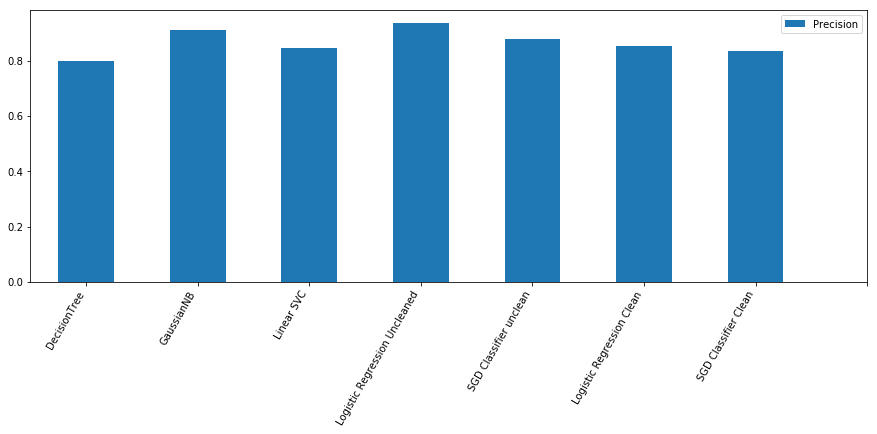

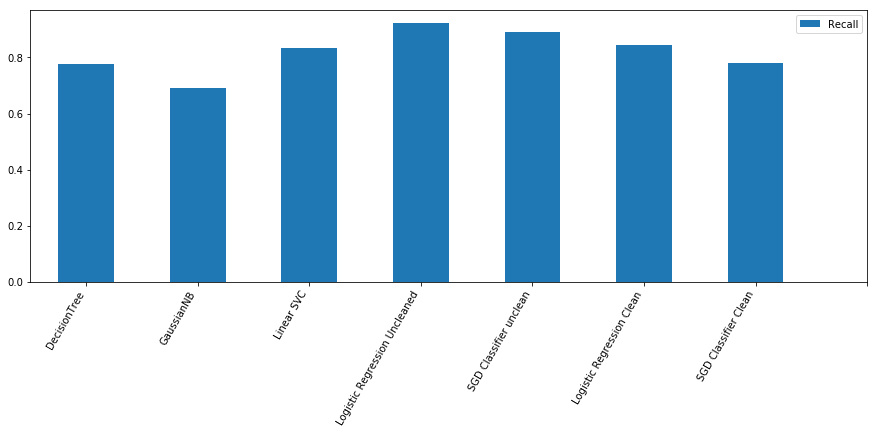

In [525]:

acc_df = pd.DataFrame(accuracylist)
acc_df.plot.bar()
plt.xticks(np.arange(0, 1+7),acc_df['Model'],rotation=60,ha = 'right')
plt.figure(figsize=(5, 5))
prec_df = pd.DataFrame(precisionlist)
prec_df.plot.bar()
plt.xticks(np.arange(0, 1+7),acc_df['Model'],rotation=60,ha = 'right')
rec_df = pd.DataFrame(recalllist)
rec_df.plot.bar()
plt.xticks(np.arange(0, 1+7),acc_df['Model'],rotation=60,ha = 'right')

plt.show()

<b><u> Analysis</u></b>
<ul><li>Here we are plotting accuracy, recall, precision for all the algorithms. SGD Classifier and LogisticRegression is done on clean as well as on full data(dirty/unclean)
<li>The algorithm that runs best is Logistic Regression for Dirty/Uncleaned data. It has high accuracy,precision and recall.

iii. Consistent Features

In [543]:
# print(coef_Logistic)
features = list(crime_df_DT.columns[:-1])

target = crime_df_DT.columns[-1]
coefLog = coef_Logistic[0]
print("High Predictive Features using Logistic Regression")
top10index = coefLog.argsort()[-10:][::-1]
for index in top10index:
    print(features[index] ,"\t\t", coefLog[index])
    
coefSGD = coef_SGD[0]
print("\nHigh Predictive Features using SGD")
top10index = coefSGD.argsort()[-10:][::-1]
for index in top10index:
    print(features[index] ,"\t\t", coefSGD[index])

High Predictive Features using Logistic Regression
racepctblack 		 2.40508690356
MalePctDivorce 		 1.40500530118
racePctHisp 		 1.34849910891
PctPersDenseHous 		 1.30838765889
PctIlleg 		 1.08945994547
TotalPctDiv 		 1.08876743639
HousVacant 		 1.07200526253
RentHighQ 		 1.00327110296
OtherPerCap 		 0.956995256311
MedRentPctHousInc 		 0.873664146757

High Predictive Features using SGD
racepctblack 		 18.6519518424
PctIlleg 		 8.78329076979
PctPersDenseHous 		 8.03538854433
MedRentPctHousInc 		 7.62495439621
MalePctDivorce 		 7.26924480117
HousVacant 		 7.11419190077
racePctHisp 		 7.01386355345
TotalPctDiv 		 6.53046333455
OtherPerCap 		 6.43013498723
RentHighQ 		 6.16563298066


<b><u>Analysis</u></b>
<ul>
<li> The consistently predictive features of high crime rate are MalePctDivorce, RentHighQ,PctIlleg,TotalPctDiv
<li>The most predictive high crime rate features is given better by Linear regression and Logistic Regression as the most positive coef are considered as more predicitve features for high crime rate and most negative coefficient are considered as more predictive features for low crime rate

5 b ii. Finding the threshold for dividing high crime areas.

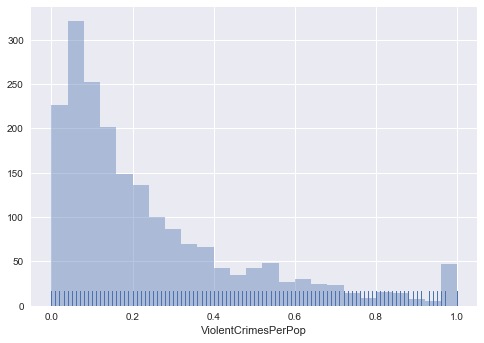

In [544]:
plt.figure()
sns.distplot(y_LR, kde=False, rug=True)
plt.show()

<b><u>Analysis</u></b>
<ul><li>We could have used threshold as mean = 0.24 of the ViolentCrimesPerPop as given in the document, but it is necessary to check whether the distribution is normal.
<li>Hence I plotted the above graph which shows that the data is not normally distributed.
<li>Instead the we can see that the data is more saturated towards 0. Hence taking mean as threshold is not a solution.
<li>So we take median =0.15 as a threshol value.

iii. CV Results for full and clean dataset

In [566]:
#Cleaned Data
crime_df_DT = crime_df.copy()
crime_df_DT['highCrime'] = np.where(crime_df_DT['ViolentCrimesPerPop'] > 0.15, True , False)
crime_df_DT = crime_df_DT.drop(['state','communityname','fold','ViolentCrimesPerPop'],axis=1)
dt_estimator_crossval = DecisionTreeClassifier()
accuracy_score = cross_val_score(dt_estimator_crossval, X_train, y_train, cv=10,scoring = 'accuracy')
# print("Accuracy =", accuracy_score)

precision_score = cross_val_score(dt_estimator_crossval,X_train,y_train,cv =10,scoring ='precision')
# print("Precision =",precision_score)
recall_score=cross_val_score(dt_estimator_crossval, X_train, y_train, cv=10, scoring ='recall')
# print("Recall = ",recall_score)
f1_score = cross_val_score(dt_estimator_crossval, X_train, y_train, cv=10, scoring ='f1')
# print("F1 Score =",f1_score)

print("Accuracy Mean =",accuracy_score.mean())
print("Precision mean =",precision_score.mean())
print("Recall Mean",recall_score.mean())
print("F1 Score Mean =",f1_score.mean())

print("\n\nSGD Classifier Clean")
sgd_clean = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, class_weight=None, warm_start=False, average=False)
sgd_fit = sgd_clean.fit(X_train,y_train)
sgd_predict = sgd_clean.predict(X_train)

crossval_SGD = cross_val_score(sgd_clean, X_train, y_train, cv=10,scoring = 'accuracy')
prec_SGD = cross_val_score(sgd_clean, X_train, y_train, cv=10,scoring = 'precision')
recall_SGD = cross_val_score(sgd_clean, X_train, y_train, cv=10,scoring = 'recall')
print("Accuracy = ",crossval_SGD)
print("Precision = ",prec_SGD)
print("Recall = ",recall_SGD)
print("Accucracy ",crossval_SGD.mean())
print("Precision ",prec_SGD.mean())
print("Recall ",recall_SGD.mean())


print("\nnLogistic Regression Clean")
LR_CLF = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
LR_CLF_fit = LR_CLF.fit(X_train,y_train)
LR_CLF_predict = LR_CLF.predict(X_train)

crossval_LR = cross_val_score(LR_CLF, X_train, y_train, cv=10,scoring = 'accuracy')
prec_LR = cross_val_score(LR_CLF, X_train, y_train, cv=10,scoring = 'precision')
recall_LR = cross_val_score(LR_CLF, X_train, y_train, cv=10,scoring = 'recall')
print("Accuracy = ",crossval_LR)
print("Precision = ",prec_LR)
print("Recall = ",recall_LR)

print("Accuracy " ,crossval_LR.mean())
print('Precision ',prec_LR.mean())
print('Recall ',recall_LR.mean())

Accuracy Mean = 0.734037688442
Precision mean = 0.79272801541
Recall Mean 0.7816
F1 Score Mean = 0.778869521542


SGD Classifier Clean
Accuracy =  [ 0.675       0.89        0.775       0.74874372  0.63316583  0.69346734
  0.75376884  0.49748744  0.68341709  0.79899497]
Precision =  [ 0.84962406  0.82        0.85106383  0.78807947  0.91463415  0.87804878
  0.92307692  0.98305085  0.71764706  0.94382022]
Recall =  [ 0.88   0.968  0.96   0.752  0.784  0.512  0.688  0.976  0.96   0.424]
Accucracy  0.714904522613
Precision  0.866904534104
Recall  0.7904

nLogistic Regression Clean
Accuracy =  [ 0.78        0.865       0.885       0.82914573  0.70854271  0.70351759
  0.81407035  0.82914573  0.83417085  0.80904523]
Precision =  [ 0.75796178  0.83561644  0.875       0.85826772  0.87640449  0.82352941
  0.84920635  0.96907216  0.82394366  0.85365854]
Recall =  [ 0.952  0.976  0.952  0.872  0.624  0.672  0.856  0.752  0.936  0.84 ]
Accuracy  0.805763819095
Precision  0.852266055719
Recall  0.843